# Main library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
import string, nltk, re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Building Deep Learning model
from tensorflow.keras.layers import Dense, Embedding, Dropout, GlobalAveragePooling1D
import tensorflow.keras as k

# Reading Data

In [2]:
data = pd.read_csv(r"D:\Courses language programming\11_Natural Language Processing\Projects For NLP\Data\IMDB Dataset of 50K Movie Reviews\IMDB Dataset.csv")
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.shape

(50000, 2)

In [4]:
data = data.loc[10000:20000]

In [5]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

# Make Encoder ==> Data 

In [6]:
data.loc[data["sentiment"] == "positive", "sentiment"] = 1
data.loc[data["sentiment"] == "negative", "sentiment"] = 0

In [7]:
data.head(5)

,review,sentiment
10000,""" While sporadically engrossing (including a f...",0
10001,"A French novelist, disgusted by his wife's soc...",1
10002,"It must be remembered that the Gammera movies,...",0
10003,"I gave this film 8 out of 10, reserving 10 for...",1
10004,"Cheap, gloriously bad cheese from the 80's, th...",0


In [8]:
data.head(2)

,review,sentiment
10000,""" While sporadically engrossing (including a f...",0
10001,"A French novelist, disgusted by his wife's soc...",1


# Make Analysis To Text & Remove punctuation & Stopwords 

In [9]:
punc = list(string.punctuation)
stop_word = stopwords.words("english")
lemma = WordNetLemmatizer()

In [10]:
# def Analysis_text(data):
#     data = data.lower()
#     data = [lemma.lemmatize(word) for word in word_tokenize(data) if (word not in punc) and (word not in stop_word)]
#     data = " ".join(data)
    
#     return data

def Analysis_text(data):
    data = data.lower()
    data = [word for word in word_tokenize(data) if (word not in punc) and (word not in stop_word)]
    data = " ".join(data)
    
    return data

In [11]:
data["review"] = data["review"].apply(Analysis_text)

In [12]:
data.head(5)

,review,sentiment
10000,`` sporadically engrossing including effective...,0
10001,french novelist disgusted wife 's society frie...,1
10002,must remembered gammera movies like many first...,0
10003,gave film 8 10 reserving 10 e.g amadeus 9 slum...,1
10004,cheap gloriously bad cheese 80 's decade chees...,0


In [13]:
X = data["review"]
Y = data["sentiment"]

# Make one hot encoder To Y(Output)

In [14]:
label = to_categorical(Y, 2)
label[0]

array([1., 0.], dtype=float32)

# Make Tokenization

In [15]:
tokenize = Tokenizer()
tokenize.fit_on_texts(X)

token_seq = tokenize.texts_to_sequences(X)
max_sen = max([len(i) for i in token_seq])

pad_data = pad_sequences(token_seq, maxlen=max_sen, padding="pre")

print("The MAx Length Sentence is --> ", max_sen)
print("The Shape Of Padding Data --> ", pad_data.shape)

The MAx Length Sentence is -->  964
The Shape Of Padding Data -->  (10001, 964)


In [16]:
voc_size = len(tokenize.word_index) + 1

print("The Length Of Vocab Size is --> ", voc_size)

The Length Of Vocab Size is -->  53942


# Splitting Data to Training & Testing

In [17]:
x_train, x_test, y_train, y_test = train_test_split(pad_data, label, train_size=0.7)

# Building Deep Learning Model

In [18]:
# model = k.models.Sequential([
#     Embedding(voc_size, max_sen, input_length=max_sen),
#     GlobalAveragePooling1D(),
#     Dense(128, activation="relu"),
#     Dropout(0.2),
#     Dense(2, activation="softmax")
# ])

# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# model.summary()


model = k.models.Sequential([
    Embedding(voc_size, max_sen, input_length=max_sen),
    GlobalAveragePooling1D(),

    Dense(2, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 964, 964)          52000088  
                                                                 
 global_average_pooling1d (G  (None, 964)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 2)                 1930      
                                                                 
Total params: 52,002,018
Trainable params: 52,002,018
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
219/219 [==============================] - 10s 44ms/step - loss: 0.6589 - accuracy: 0.6570 - val_loss: 0.6038 - val_accuracy: 0.7851
Epoch 2/10
219/219 [==============================] - 10s 44ms/step - loss: 0.5083 - accuracy: 0.8077 - val_loss: 0.4564 - val_accuracy: 0.8421
Epoch 3/10
219/219 [==============================] - 10s 44ms/step - loss: 0.3512 - accuracy: 0.8966 - val_loss: 0.3760 - val_accuracy: 0.8590
Epoch 4/10
219/219 [==============================] - 10s 44ms/step - loss: 0.2583 - accuracy: 0.9240 - val_loss: 0.3322 - val_accuracy: 0.8674
Epoch 5/10
219/219 [==============================] - 10s 44ms/step - loss: 0.1996 - accuracy: 0.9430 - val_loss: 0.3170 - val_accuracy: 0.8784
Epoch 6/10
219/219 [==============================] - 10s 44ms/step - loss: 0.1534 - accuracy: 0.9614 - val_loss: 0.3061 - val_accuracy: 0.8767
Epoch 7/10
219/219 [==============================] - 10s 44ms/step - loss: 0.1212 - accuracy: 0.9714 - val_loss: 0.3046 - val_accuracy:

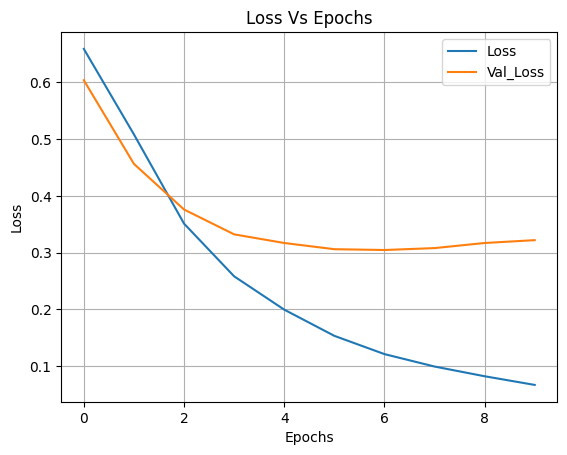

In [21]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

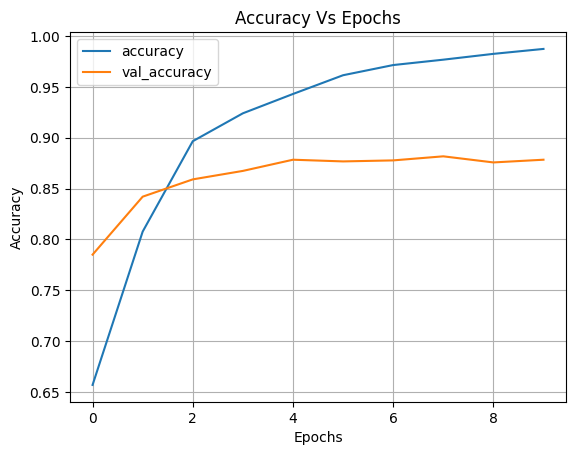

In [22]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()